In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.rcParams.update({'font.size': 20})

In [16]:
def plot(df, cond_col, cond_val, var1, var2):
    data = df[df[cond_col] == cond_val]
    horizons = np.sort(data['horizon'].unique())
    k = int(np.floor(len(horizons)/2))
    fig, ax = plt.subplots(nrows=int(len(horizons)/2), ncols=int(len(horizons)/2), sharex=True, sharey=True, 
                           figsize=(15, 10))
    c = 0
    for i in range(k):
        for j in range(k):
            data_horizon = data[data['horizon'] == horizons[c]]
            cm = [h % (horizons[c] or 1) for h in range(data_horizon.shape[0])]
            # plot model data
            ax[i, j].scatter(np.arange(data_horizon.shape[0]), data_horizon[var1], c=cm, 
                        alpha=1, s=50)
            # plot actual data
            ax[i, j].scatter(np.arange(data_horizon.shape[0]), data_horizon[var2], c='red', 
                        alpha=0.5, s=10)
            if j == 0:
                ax[i, j].set_ylabel('Altitude')
            if i == k - 1:
                ax[i, j].set_xlabel('Timestamp')
            title = horizons[c]
            if horizons[c] >= 100000:
                title = "infinite"
            ax[i, j].set_title(f"{cond_col}: {cond_val}, horizon: {title}")
            c = c + 1
            fig.savefig(f"model_validation_updated_drag_{cond_col}_{cond_val}.png")

In [3]:
path = 'C:/Users/aganb/Desktop/Thesis/code/v1.0/logs/model_validation_drag_with_alt_vel'
all_files = glob.glob(path + "/*.csv")
df_from_each_file = (pd.read_csv(f) for f in all_files)
data = pd.concat(df_from_each_file, ignore_index=True)
# data = pd.read_csv('C:/Users/aganb/Desktop/Thesis/code/v1.0/logs/model_validation_drag_with_alt_vel/updated_drag.csv')
# data = data[data['horizon'] < 1000]
data.shape

(9235, 17)

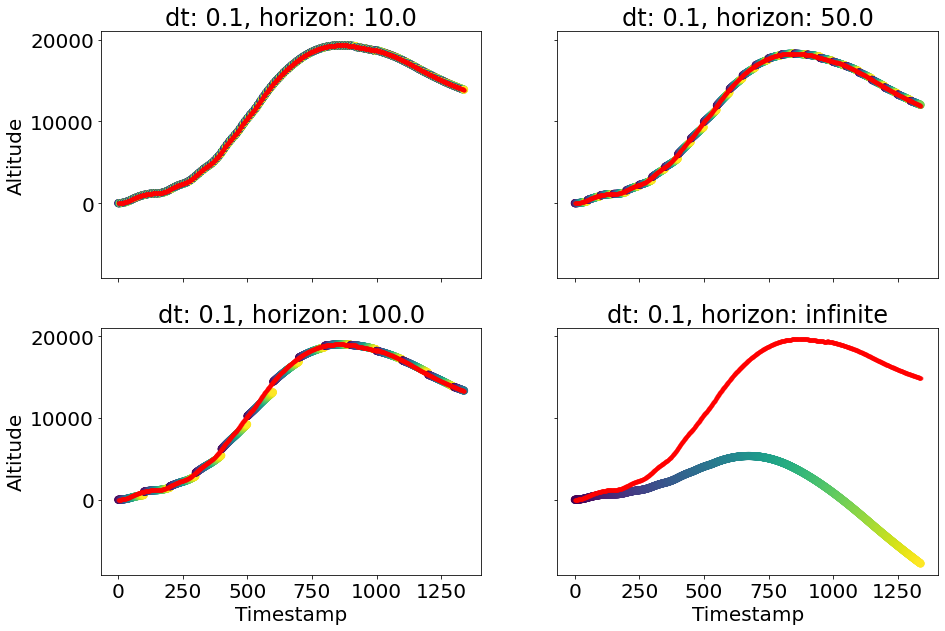

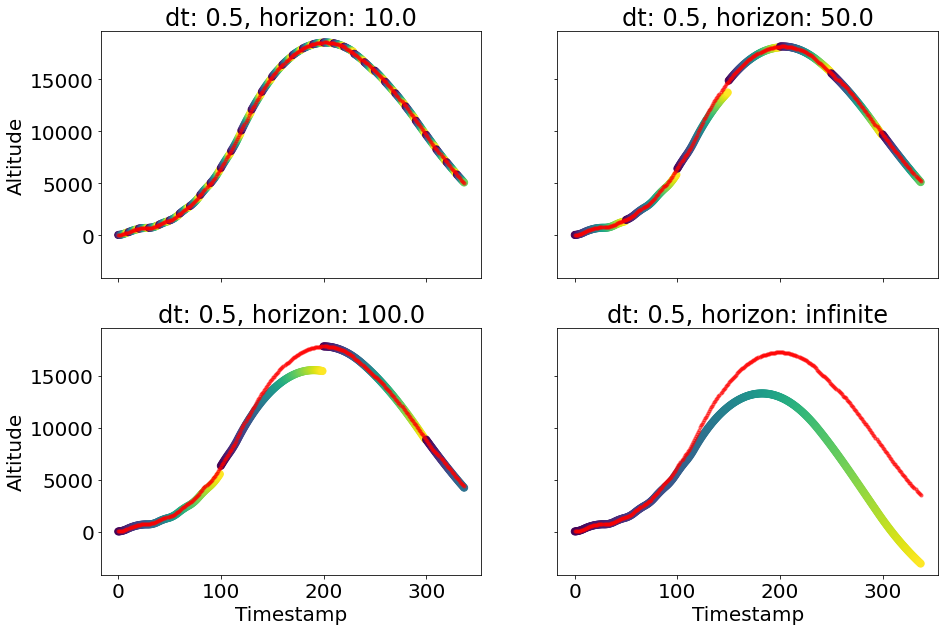

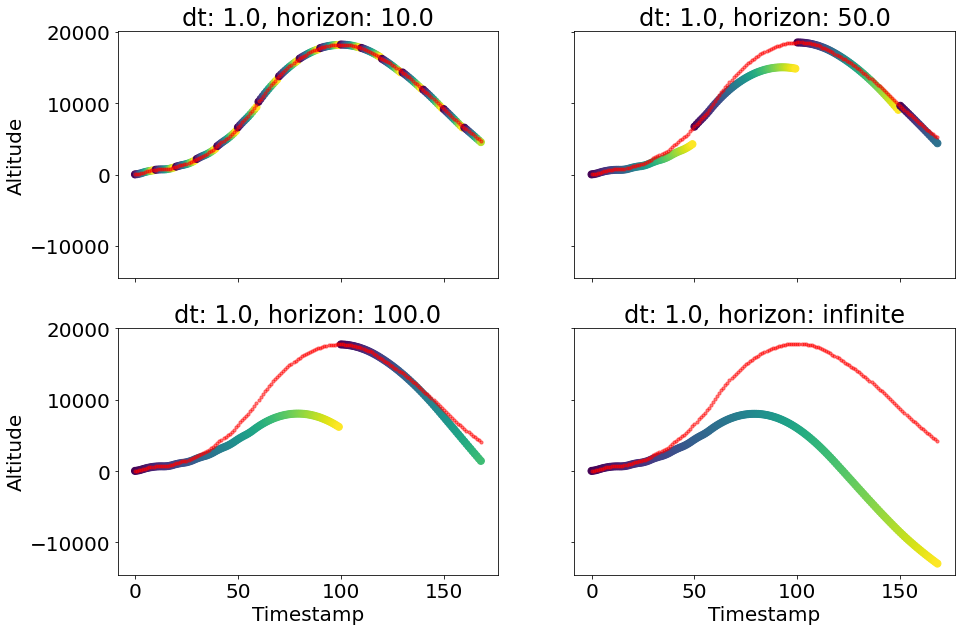

In [17]:
data = data[data['horizon'] != 20]
for h in np.sort(data['dt'].unique()):
    plot(data, 'dt', h, 'Model Altitude', 'Actual Altitude')

## Altitude R2 scores

In [56]:
df_r2 = pd.DataFrame(columns=data['dt'].unique(), index=data['horizon'].unique())

In [57]:
for dt in data['dt'].unique():
    for horizon in data['horizon'].unique():
        filtered_df = data[(data['horizon'] == horizon) & (data['dt'] == dt)]
        df_r2[dt][horizon] = r2_score(filtered_df['Actual Altitude'], filtered_df['Model Altitude'])

In [58]:
df_r2

,0.1,0.5,1.0
100000.0,-2.51293,0.494655,-2.24624
100.0,0.998157,0.985555,0.556941
10.0,0.999978,0.999957,0.999827
50.0,0.999485,0.998757,0.961941


# Velocity R2 scores

In [7]:
df_r2 = pd.DataFrame(columns=data['dt'].unique(), index=data['horizon'].unique())
for dt in data['dt'].unique():
    for horizon in data['horizon'].unique():
        filtered_df = data[(data['horizon'] == horizon) & (data['dt'] == dt)]
        df_r2[dt][horizon] = r2_score(filtered_df['Actual Velocity'], filtered_df['Model Velocity'])

In [8]:
df_r2

,0.1,0.5,1.0
100000.0,-0.0779364,0.937088,0.632847
100.0,0.981865,0.984977,0.710265
10.0,0.999128,0.999297,0.992378
50.0,0.986145,0.992476,0.932713
